# LeNet on Cifar

This is LeNet (6c-16c-120-84) on Cifar10. Adam algorithm (lr=0.001) with 100 epoches.


#### LeNet

    Total params: 44,426
    Trainable params: 44,426
    Non-trainable params: 0


####  LeNet with 10 intrinsic dim

    Total params: 682,076
    Trainable params: 10
    Non-trainable params: 682,066
    
#### LeNet with 15000 intrinsic dim    
    Total params: 930,167,006
    Trainable params: 15,000
    Non-trainable params: 930,152,006

In [8]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

In [9]:
def extract_num(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
#     run_time_str       = lines0[-10]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
#     run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy #, run_time

In [24]:
results_dir = '../results/lrb_lenet_cifar/'

dim = [0,10,50,100,250,500,750,1000,1250,1500,1750,2000,2500,3000,4000,5000,10000,15000,16000,17000,18000,19000,20000,21000,25000,30000,35000,40000,45000,50000]

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)
  
diary_names_ordered = []
for d in dim:
    for f in diary_names:
        if '_'+str(d)+'/' in f:
            # print "%d is in" % d + f
            diary_names_ordered.append(f)        
 
# intrinsic update method
Rs = []
i = 0
for fname in diary_names_ordered:
    with open(fname,'r') as ff:
        lines0 = ff.readlines()
        R = extract_num(lines0)
        print "%d dim:\n"%dim[i] + str(R) + "\n"
        i += 1

        Rs.append(R)
                            
Rs = np.array(Rs)




0 dim:
(1.01539, 0.6469, 1.17757, 0.59576)

10 dim:
(3.54838, 0.1176, 8.04742, 0.09838)

50 dim:
(2.89372, 0.1026, 5.80965, 0.09782)

100 dim:
(2.45154, 0.1049, 3.77091, 0.09966)

250 dim:
(2.34088, 0.1126, 3.15073, 0.10368)

500 dim:
(2.26612, 0.1674, 2.43965, 0.11376)

750 dim:
(2.06156, 0.2198, 2.23409, 0.1632)

1000 dim:
(1.98951, 0.2655, 2.16624, 0.18432)

1250 dim:
(1.89666, 0.2956, 2.07213, 0.20546)

1500 dim:
(1.85398, 0.3113, 2.02529, 0.21956)

1750 dim:
(1.8027, 0.3207, 1.97152, 0.23738)

2000 dim:
(1.78534, 0.3613, 1.96328, 0.24452)

2500 dim:
(1.77404, 0.333, 1.9165, 0.256)

3000 dim:
(1.72618, 0.3506, 1.88359, 0.27404)

4000 dim:
(1.63897, 0.3959, 1.80887, 0.31916)

5000 dim:
(1.59235, 0.4146, 1.74418, 0.3389)

10000 dim:
(1.39927, 0.5138, 1.58611, 0.42422)

15000 dim:
(1.31614, 0.5377, 1.50521, 0.45814)

16000 dim:
(1.30302, 0.5384, 1.50335, 0.4611)

17000 dim:
(1.31779, 0.5239, 1.48574, 0.46818)

18000 dim:
(1.29441, 0.5364, 1.48503, 0.46712)

19000 dim:
(1.28327, 0.5355

## Performance comparison with Baseline

"Baseline method" indicates optimization in the parameter space.

The proposed method first embeds parameters into the intrinisic space (via orthogonal matrix), and optimization is the new space.

The dimension of intrinsic space indicates the degree of freedom in the weights of neural nets.

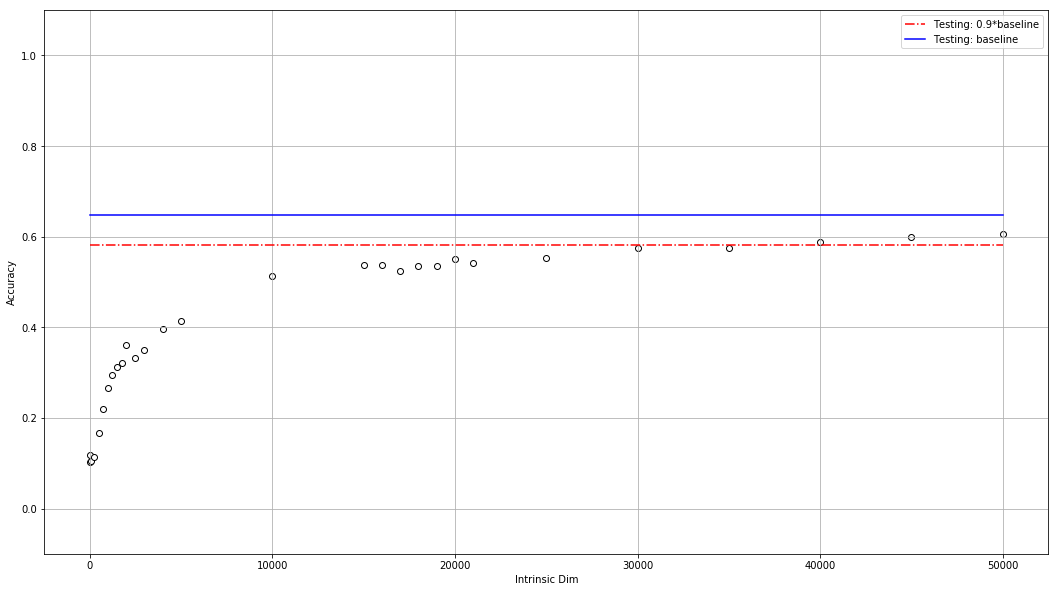

In [25]:
nn = len(Rs)-1
fig, ax = subplots(figsize=(5,4) )
  
   
plt.scatter(dim[1:], Rs[1:,1], edgecolor="k", facecolor="w" )
ax.plot(dim[1:], Rs[0,1]*np.ones(nn)*0.9,'r-.', label="Testing: 0.9*baseline")
ax.plot(dim[1:], Rs[0,1]*np.ones(nn),'b-', label="Testing: baseline")
ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Accuracy')
plt.grid()
ax.legend()
ax.set_ylim([-0.1,1.1])
fig.set_size_inches(18, 10)

The above figure show that updating in the intrinsic space can prevent overfitting.


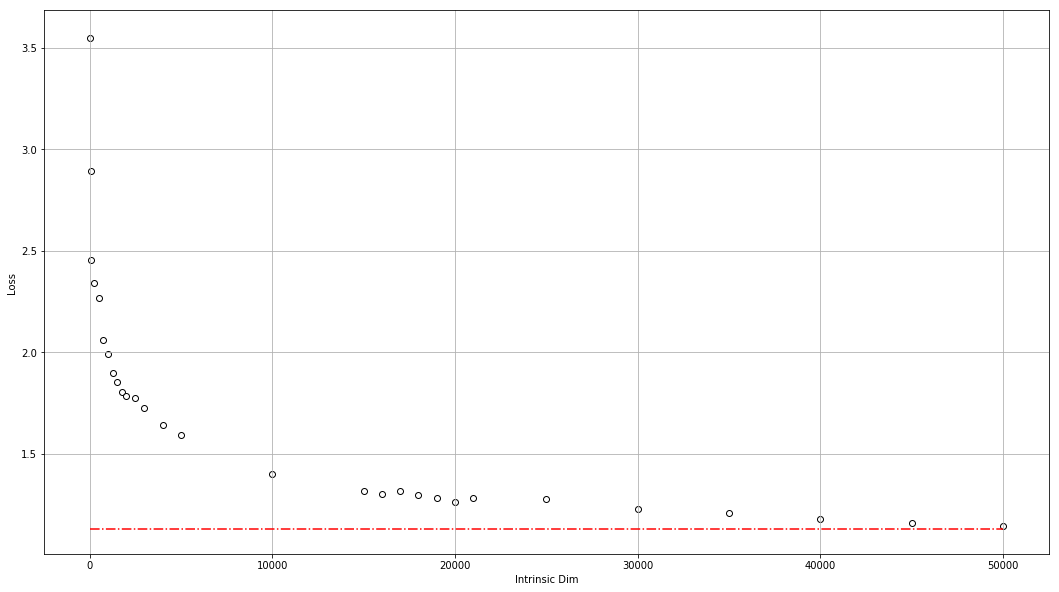

In [26]:
nn = len(Rs)-1
fig, ax = subplots(figsize=(5,4) )
                  
plt.scatter(dim[1:], Rs[1:,0], edgecolor="k", facecolor="w" )
ax.plot(dim[1:], Rs[0,0]*np.ones(nn)/0.9,'r-.', label="Testing: baseline")
ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Loss')
plt.grid()
# ax.set_ylim([-0.1,1.1])
fig.set_size_inches(18, 10)